In [83]:
result_file = 'result.csv'
model = 'Ailerons_d10_l763_n1525_20240921182215'

In [84]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
727,Ailerons_d10_l763_n1525_20240921182215,0,0.000000,Ailerons,1G,1,0.825474
728,Ailerons_d10_l763_n1525_20240921182215,1,-0.003083,Ailerons,1G,1,0.606099
729,Ailerons_d10_l763_n1525_20240921182215,2,-0.003083,Ailerons,1G,1,0.641710
730,Ailerons_d10_l763_n1525_20240921182215,1,-0.002765,Ailerons,1G,1,0.653391
731,Ailerons_d10_l763_n1525_20240921182215,2,-0.002765,Ailerons,1G,1,0.602122
732,Ailerons_d10_l763_n1525_20240921182215,1,-0.002448,Ailerons,1G,1,0.620123
733,Ailerons_d10_l763_n1525_20240921182215,2,-0.002448,Ailerons,1G,1,0.683431
734,Ailerons_d10_l763_n1525_20240921182215,1,-0.002130,Ailerons,1G,1,0.639105
735,Ailerons_d10_l763_n1525_20240921182215,2,-0.002130,Ailerons,1G,1,0.642784
736,Ailerons_d10_l763_n1525_20240921182215,1,-0.001813,Ailerons,1G,1,0.646512


In [85]:
data = df[df['pruned'] == 0]['data'].values[0]
threads = df[df['pruned'] == 0]['threads'].values[0]
scale = df[df['pruned'] == 0]['scale'].values[0]


base_line = df[df['pruned'] == 0]['time'].values[0]
x = df[df['pruned'] == 1]['predicate'].values
y1 = df[df['pruned'] == 1]['time'].values
y2 = df[df['pruned'] == 2]['time'].values

(0.0, 0.8366411231652213)

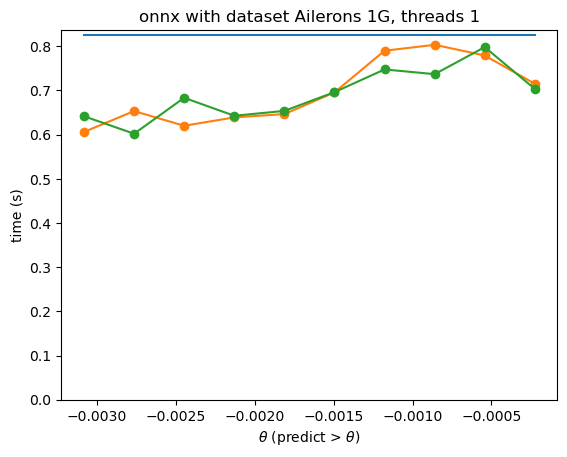

In [86]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))])
plt.plot(x, y1, marker='o')
if len(y2) > 0:
    plt.plot(x, y2, marker='o')
plt.title(f'onnx with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.ylim(0)

(0.0, 1.3894866778569945)

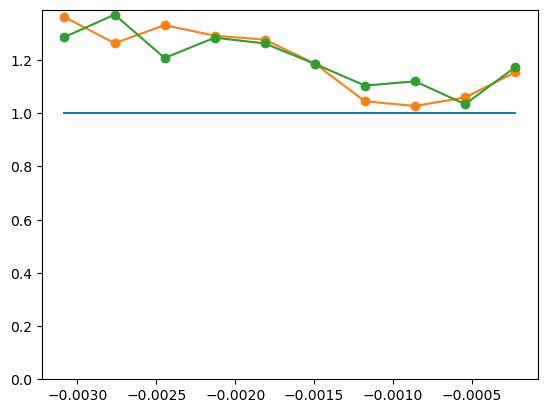

In [87]:
plt.plot(x, [1 for _ in range(len(x))])
plt.plot(x, base_line / y1, marker='o')
if len(y2) > 0:
    plt.plot(x, base_line / y2, marker='o')
plt.ylim(0)